<a href="https://colab.research.google.com/github/ritwikraha/CV-Practice/blob/master/Pix2Struct_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoProcessor,Pix2StructForConditionalGeneration, Pix2StructProcessor

In [4]:
url = "https://i.imgur.com/T0uzcPj.png"
image = Image.open(requests.get(url, stream=True).raw)

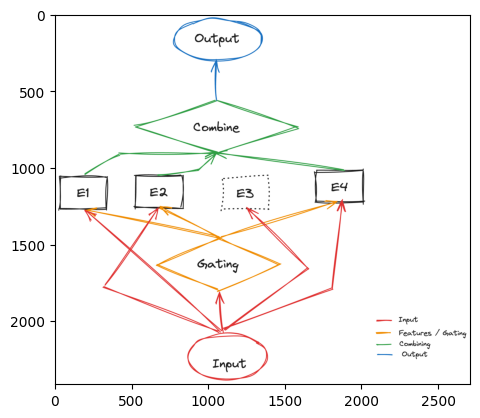

In [5]:
plt.imshow(image)

In [6]:
model = Pix2StructForConditionalGeneration.from_pretrained("google/pix2struct-textcaps-base").to("cuda")
processor = Pix2StructProcessor.from_pretrained("google/pix2struct-textcaps-base")


config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/217 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.58k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [15]:



# image only
inputs = processor(images=image, return_tensors="pt").to("cuda")

predictions = model.generate(**inputs)
print(processor.decode(predictions[0], skip_special_tokens=True))


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


A whiteboard with a diagram showing how to combine input and features.


In [19]:
text = "This is a diagram of mixture of"

In [16]:
# image and text
input_conditional = processor(images=image, text=text, return_tensors="pt").to("cuda")


In [17]:
predictions = model.generate(**input_conditional)
print(processor.decode(predictions[0], skip_special_tokens=True))

This is a diagram of mixture of board with the word "Input" on it.


In [20]:
model_matcha = Pix2StructForConditionalGeneration.from_pretrained("google/matcha-chartqa").to("cuda")
processor_matcha = AutoProcessor.from_pretrained("google/matcha-chartqa")

config.json:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/249 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.62k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.27M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

In [21]:
input_matcha = processor_matcha(images=image, text="Diagram of", return_tensors="pt").to("cuda")
predictions = model_matcha.generate(**inputs, max_new_tokens=512)


Arial.TTF:   0%|          | 0.00/276k [00:00<?, ?B/s]

2.25


In [22]:
print(processor.decode(predictions[0], skip_special_tokens=True))

2.25
